In [1]:
import pandas as pd

naslib_path = '../../zero_cost/NASLib'
benchmark = 'zc_nasbench301'

In [2]:
from zc_combine.utils.naslib_utils import load_search_space, parse_scores

search_space = load_search_space(naslib_path, benchmark)
dfs = parse_scores(search_space)

In [3]:
dataset = 'cifar10'
data = dfs[dataset]

In [4]:
from naslib.search_spaces.nasbench301.conversions import convert_compact_to_genotype
from zc_combine.features.conversions import darts_to_graph


def get_darts_net(n):
    genotype = convert_compact_to_genotype(eval(n))
    return darts_to_graph(genotype.normal), darts_to_graph(genotype.reduce)

In [5]:
nets = {i: get_darts_net(data.loc[i]['net']) for i in data.index}

In [6]:
import json

with open('../zc_combine/configs/nb301_first.json', 'r') as f:
    cfg = json.load(f)

In [7]:
from zc_combine.features.darts import feature_func_dict
from zc_combine.features.dataset import get_feature_dataset

feature_dataset = get_feature_dataset(nets, cfg, feature_func_dict)
feature_dataset.keys()

dict_keys(['op_count', 'min_path_len', 'max_op_on_path', 'node_degree'])

In [13]:
feature_dataset['node_degree']

,"node_degree_allowed_[6, 7]_normal_c_{k-2}_degree","node_degree_allowed_[6, 7]_normal_c_{k-1}_degree","node_degree_allowed_[6, 7]_normal_out_degree","node_degree_allowed_[6, 7]_normal_avg_in","node_degree_allowed_[6, 7]_normal_avg_out","node_degree_allowed_[6, 7]_reduce_c_{k-2}_degree","node_degree_allowed_[6, 7]_reduce_c_{k-1}_degree","node_degree_allowed_[6, 7]_reduce_out_degree","node_degree_allowed_[6, 7]_reduce_avg_in","node_degree_allowed_[6, 7]_reduce_avg_out",...,node_degree_allowed_[5]_normal_c_{k-2}_degree,node_degree_allowed_[5]_normal_c_{k-1}_degree,node_degree_allowed_[5]_normal_out_degree,node_degree_allowed_[5]_normal_avg_in,node_degree_allowed_[5]_normal_avg_out,node_degree_allowed_[5]_reduce_c_{k-2}_degree,node_degree_allowed_[5]_reduce_c_{k-1}_degree,node_degree_allowed_[5]_reduce_out_degree,node_degree_allowed_[5]_reduce_avg_in,node_degree_allowed_[5]_reduce_avg_out
idx,,,,,,,,,,,,,,,,,,,,,
0,2,1,0,0.428571,0.428571,0,1,0,0.285714,0.285714,...,0,2,0,0.285714,0.285714,0,2,0,0.428571,0.428571
1,1,1,0,0.428571,0.428571,0,0,0,0.142857,0.142857,...,1,0,0,0.142857,0.142857,2,0,0,0.285714,0.285714
2,0,1,0,0.142857,0.142857,2,0,0,0.285714,0.285714,...,1,0,0,0.142857,0.142857,0,0,0,0.000000,0.000000
3,1,1,0,0.285714,0.285714,1,0,0,0.142857,0.142857,...,0,0,0,0.142857,0.142857,0,0,0,0.000000,0.000000
4,1,0,0,0.285714,0.285714,0,0,0,0.142857,0.142857,...,0,1,0,0.142857,0.142857,1,1,0,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,2,1,0,1.000000,1.000000,0,1,0,0.285714,0.285714,...,0,0,0,0.000000,0.000000,2,0,0,0.285714,0.285714
11217,1,1,0,0.285714,0.285714,0,2,0,0.571429,0.571429,...,1,1,0,0.571429,0.571429,0,0,0,0.000000,0.000000
11218,1,0,0,0.428571,0.428571,0,2,0,0.428571,0.428571,...,1,0,0,0.285714,0.285714,0,0,0,0.000000,0.000000


In [14]:
features = ['op_count', 'min_path_len', 'max_op_on_path', 'node_degree']
dataset = pd.concat([feature_dataset[f] for f in features], axis=1)
dataset['val_accs'] = data['val_accs']
dataset

/tmp/ipykernel_12306/298988611.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['val_accs'] = data['val_accs']


,op_count_normal_0,op_count_normal_1,op_count_normal_2,op_count_normal_3,op_count_normal_4,op_count_normal_5,op_count_normal_6,op_count_normal_7,op_count_reduce_0,op_count_reduce_1,...,node_degree_allowed_[5]_normal_c_{k-1}_degree,node_degree_allowed_[5]_normal_out_degree,node_degree_allowed_[5]_normal_avg_in,node_degree_allowed_[5]_normal_avg_out,node_degree_allowed_[5]_reduce_c_{k-2}_degree,node_degree_allowed_[5]_reduce_c_{k-1}_degree,node_degree_allowed_[5]_reduce_out_degree,node_degree_allowed_[5]_reduce_avg_in,node_degree_allowed_[5]_reduce_avg_out,val_accs
idx,,,,,,,,,,,,,,,,,,,,,
0,4,1,0,2,0,2,1,2,4,0,...,2,0,0.285714,0.285714,0,2,0,0.428571,0.428571,93.459999
1,4,2,0,1,1,1,2,1,4,2,...,0,0,0.142857,0.142857,2,0,0,0.285714,0.285714,92.790001
2,4,4,0,1,1,1,0,1,4,1,...,0,0,0.142857,0.142857,0,0,0,0.000000,0.000000,93.320000
3,4,2,1,0,2,1,2,0,4,4,...,0,0,0.142857,0.142857,0,0,0,0.000000,0.000000,92.809998
4,4,1,2,1,1,1,1,1,4,1,...,1,0,0.142857,0.142857,1,1,0,0.285714,0.285714,92.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,4,1,0,0,0,0,4,3,4,0,...,0,0,0.000000,0.000000,2,0,0,0.285714,0.285714,92.919998
11217,4,0,1,0,1,4,0,2,4,1,...,1,0,0.571429,0.571429,0,0,0,0.000000,0.000000,92.750000
11218,4,3,0,0,0,2,2,1,4,2,...,0,0,0.285714,0.285714,0,0,0,0.000000,0.000000,92.080002


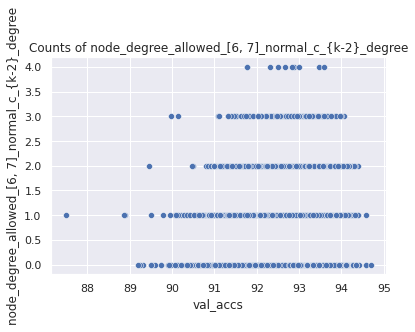

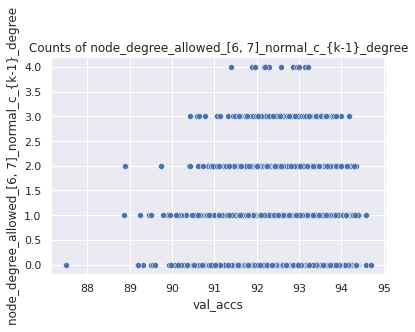

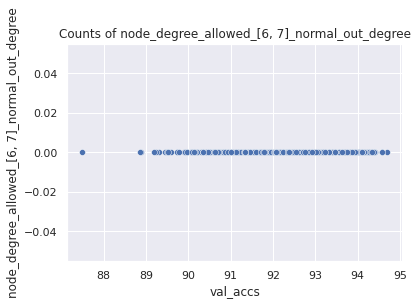

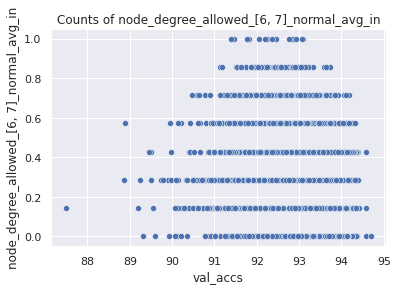

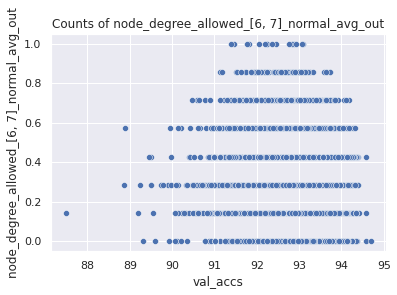

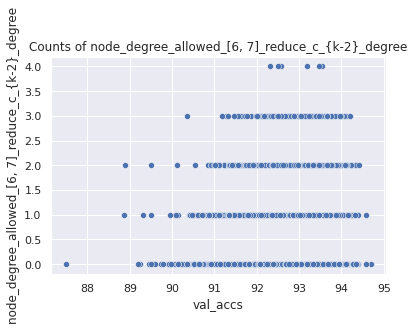

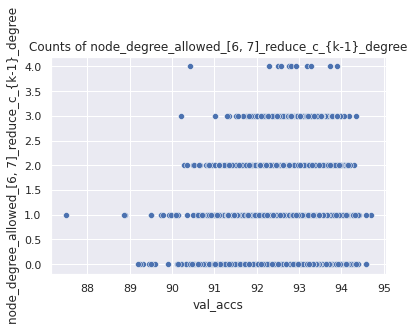

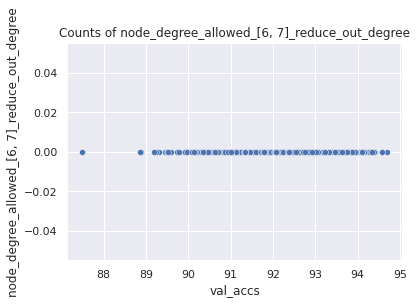

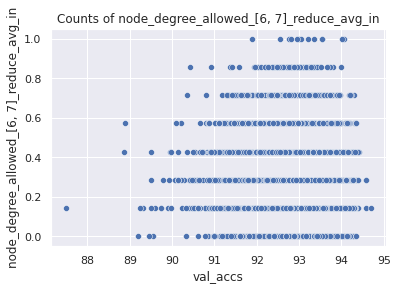

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plot_df = feature_dataset['node_degree'].copy()
plot_df['val_accs'] = data['val_accs']

import os
#os.mkdir('tmp')

max_plots = 8

for i, c in enumerate(plot_df.columns):
    if c == 'val_accs' or i > max_plots:
        continue
    plt.figure()
    sns.scatterplot(data=plot_df, x='val_accs', y=c)
    plt.title(f"Counts of {c}")
    #plt.savefig(f'tmp/{c}.png')
    plt.show()

In [16]:
proxy_cols = [c for c in data.columns if c not in ['random', 'rank', 'new_net', 'net']]


def get_dataset(feature_dfs, proxy_df, features, cols):
    feat_dfs = [feature_dfs[f] for f in features]
    prox_df = proxy_df[cols]

    res_data = pd.concat([*feat_dfs, prox_df], axis=1)

    y = proxy_df['val_accs'].loc[res_data.index]
    if 'val_accs' in res_data:
        res_data.drop(columns=['val_accs'], inplace=True)

    return res_data, y

features = ['op_count', 'min_path_len', 'max_op_on_path', 'node_degree']
full_data, full_y = get_dataset(feature_dataset, data, features, ['flops', 'params'])
print(full_data.shape)
full_data

(11221, 268)


,op_count_normal_0,op_count_normal_1,op_count_normal_2,op_count_normal_3,op_count_normal_4,op_count_normal_5,op_count_normal_6,op_count_normal_7,op_count_reduce_0,op_count_reduce_1,...,node_degree_allowed_[5]_normal_out_degree,node_degree_allowed_[5]_normal_avg_in,node_degree_allowed_[5]_normal_avg_out,node_degree_allowed_[5]_reduce_c_{k-2}_degree,node_degree_allowed_[5]_reduce_c_{k-1}_degree,node_degree_allowed_[5]_reduce_out_degree,node_degree_allowed_[5]_reduce_avg_in,node_degree_allowed_[5]_reduce_avg_out,flops,params
0,4,1,0,2,0,2,1,2,4,0,...,0,0.285714,0.285714,0,2,0,0.428571,0.428571,169.285120,0.963882
1,4,2,0,1,1,1,2,1,4,2,...,0,0.142857,0.142857,2,0,0,0.285714,0.285714,166.336000,0.958442
2,4,4,0,1,1,1,0,1,4,1,...,0,0.142857,0.142857,0,0,0,0.000000,0.000000,145.413632,0.788522
3,4,2,1,0,2,1,2,0,4,4,...,0,0.142857,0.142857,0,0,0,0.000000,0.000000,157.939200,0.852778
4,4,1,2,1,1,1,1,1,4,1,...,0,0.142857,0.142857,1,1,0,0.285714,0.285714,152.385024,0.839978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,4,1,0,0,0,0,4,3,4,0,...,0,0.000000,0.000000,2,0,0,0.285714,0.285714,167.384576,0.980650
11217,4,0,1,0,1,4,0,2,4,1,...,0,0.571429,0.571429,0,0,0,0.000000,0.000000,209.344000,1.188458
11218,4,3,0,0,0,2,2,1,4,2,...,0,0.285714,0.285714,0,0,0,0.000000,0.000000,155.719168,0.827242
11219,4,1,1,1,0,1,1,3,4,0,...,0,0.142857,0.142857,0,0,0,0.000000,0.000000,150.967808,0.821162


In [17]:
import numpy as np
from scipy.stats import kendalltau, spearmanr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


def get_splits(fd, fy, train_size=100, seed=42):
    return train_test_split(fd, fy, random_state=seed, train_size=train_size)

def eval_rf(trx, tex, tryy, tey, n_times=1, random_state=43):
    res = {'score': [], 'tau': [], 'corr': []}
    rfs = []
    for i in range(n_times):
        rf = RandomForestRegressor(random_state=random_state + i, n_estimators=100)
        rf.fit(trx, tryy)
        res['score'].append(rf.score(tex, tey))

        preds = rf.predict(tex)
        res['tau'].append(kendalltau(preds, tey)[0])
        res['corr'].append(spearmanr(preds, tey)[0])
        rfs.append(rf)

    return rfs, res

def print_means(res):
    print(", ".join([f"{k}: {np.mean(v)}" for k, v in res.items()]))

In [118]:
import numpy as np

features = ['op_count', 'min_path_len', 'max_op_on_path', 'node_degree']
seed = 44
for ts in [100, 200, 1000]:
    print(f"Train size {ts}")
    for prox in proxy_cols:
        for include_fp in [True, False]:
            if prox in ['flops', 'params']:
                continue
            print(prox, "" if include_fp else " no fp")

            plist = ['flops', 'params', prox] if include_fp else [prox]
            fd, fy = get_dataset(feature_dataset, data, features, plist)
            data_splits = get_splits(fd, fy, train_size=ts, seed=seed)

            _, res = eval_rf(*data_splits, n_times=5)
            print_means(res)
            print()

Train size 100
val_accs 
score: 0.7512829775390143, tau: 0.6970363776793916, corr: 0.8776543958853369

val_accs  no fp
score: 0.7360810494743131, tau: 0.6893816926090557, corr: 0.8699675312225723

epe_nas 
score: 0.7472854676112235, tau: 0.6952472838279461, corr: 0.8767828697535001

epe_nas  no fp
score: 0.7324450575344339, tau: 0.6877760326317837, corr: 0.8686774994082599

fisher 
score: 0.7659636224017637, tau: 0.702344343985691, corr: 0.8805688993254177

fisher  no fp
score: 0.7636676712532078, tau: 0.7065727082860999, corr: 0.8816568518214533

grad_norm 
score: 0.7699126822566068, tau: 0.7062463324025086, corr: 0.8834239847563914

grad_norm  no fp
score: 0.7655785867844825, tau: 0.7099630030684142, corr: 0.8842132848830853

grasp 
score: 0.7464000553481359, tau: 0.6950797032619008, corr: 0.8763060136371802

grasp  no fp
score: 0.7472903496255058, tau: 0.6986531361933259, corr: 0.8769258015496512

jacov 
score: 0.8138474588065833, tau: 0.7361350452721762, corr: 0.905466291279202

ja

In [64]:
len(data)

11221

In [122]:
ts = 1000
seed = 43

all_proxies = False
prox_to_include = []
prox_to_include = ['nwot', 'fisher']
with_features = True

features = ['op_count', 'min_path_len', 'max_op_on_path', 'node_degree']
feat_list = features if with_features else []

# proxies to add to data
def_proxlist = ['params', 'flops'] if prox_to_include is None else ['params', 'flops', *prox_to_include]
prox_list = proxy_cols if all_proxies else def_proxlist

fd, fy = get_dataset(feature_dataset, data, feat_list, prox_list)
train_X, test_X, train_y, test_y = get_splits(fd, fy, train_size=ts, seed=seed)

rfs, res = eval_rf(train_X, test_X, train_y, test_y, n_times=5)
print_means(res)
rf_fitted = rfs[0]
preds = rf_fitted.predict(fd)
preds

score: 0.5102711504000437, tau: 0.5313948021406718, corr: 0.7225505901517744


array([92.91530006, 92.91940002, 92.85290047, ..., 92.25189995,
       92.60410187, 93.05309982])

In [123]:
trainpreds = rf_fitted.predict(train_X)

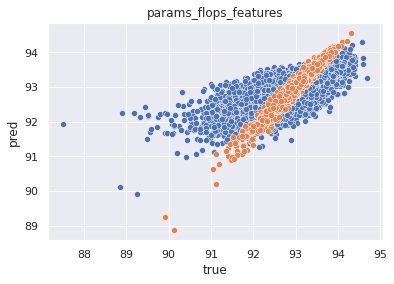

In [124]:
sns.scatterplot(data=pd.DataFrame({'pred': preds, 'true': fy}), x='true', y='pred')
sns.scatterplot(data=pd.DataFrame({'pred': trainpreds, 'true': train_y}), x='pred', y='true')
#plt.ylim(70, 95)

plt_name = f"{'all_proxies' if all_proxies else 'params_flops'}_{'features' if with_features else 'no_features'}"
plt.title(plt_name)
#plt.savefig(f"tmp/{plt_name}.png")
plt.show()

In [125]:
imps = rf_fitted.feature_importances_

pd.DataFrame({"importance": imps, "feat": fd.columns})

,importance,feat
0,0.000000,op_count_normal_0
1,0.004208,op_count_normal_1
2,0.007983,op_count_normal_2
3,0.119617,op_count_normal_3
4,0.004077,op_count_normal_4
...,...,...
265,0.001880,node_degree_allowed_[5]_reduce_avg_out
266,0.091093,params
267,0.022349,flops
268,0.187627,nwot


In [162]:
from sklearn.decomposition import PCA

pca_data = fd#data[proxy_cols]
pca = PCA(n_components=2)
pca_data = pca.fit_transform(pca_data)
pca_data

array([[-1381.62666317,   -12.83859515],
       [-1390.83665134,     4.72293304],
       [-1390.81339521,     3.95582105],
       ...,
       [-1340.03601862,    -4.7643099 ],
       [-1391.14828775,     6.71255883],
       [-1381.92952336,    -5.30844093]])

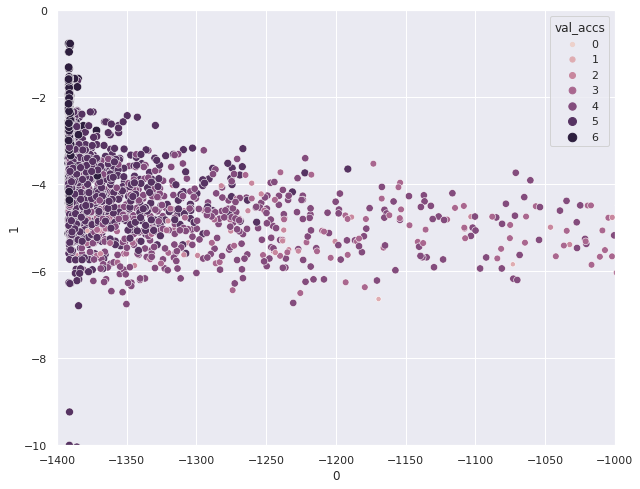

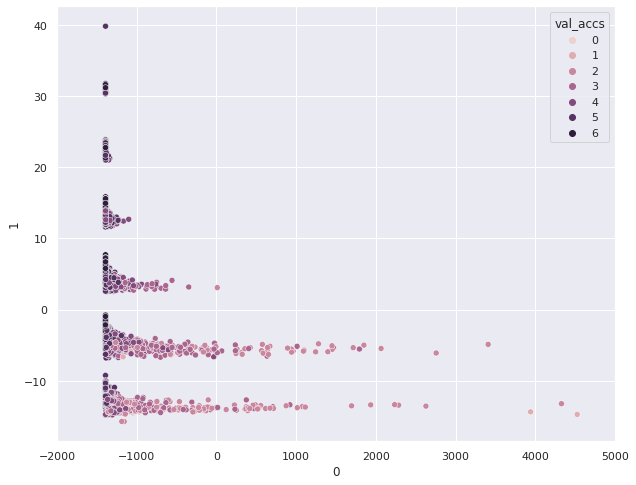

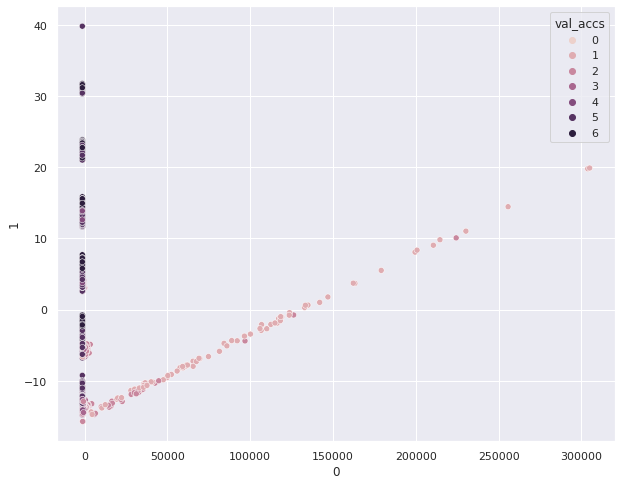

In [169]:
val_accss = data['val_accs'].to_numpy()
plot_dd = pd.DataFrame(pca_data)
plot_dd['val_accs'] = val_accss // 7


plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_dd, x=0, y=1, hue='val_accs', size='val_accs')
plt.xlim(-1400, -1000)
#plt.xlim(-1392, -1387)
plt.ylim(-10, 0)
plt.show()

plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_dd, x=0, y=1, hue='val_accs')
plt.xlim(-2000, 5000)
plt.show()

plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_dd, x=0, y=1, hue='val_accs')
#plt.xlim(-2000, 5000)
plt.show()

In [124]:
# IDEA ... sample different nets based on clustering (max distance between nets...)

In [125]:
pd.DataFrame({'pred': preds, 'true': y, 'net': data['net']})

NameError: name 'y' is not defined

In [ ]:
from scipy.stats import kendalltau, spearmanr

kendalltau(preds, dsy)[0], spearmanr(preds, dsy)[0]

In [757]:
# TODO ruzny pocty siti
# where to sample... important
# TODO predikovat pres proxyny

# TODO vyplot predikci jen pres flops/params
# ... try that on transnb101

In [ ]:
#Next steps:

# TODO lepsi nazvy sloupecku, to str
# TODO fce co to spocita a da do df (myslim ty edge_path_op atd)
# TODO predikce - pres ruzny seedy, mozna crossval
# TODO porovnani s proxynama a bez, xgboost,...
# TODO tnb101

# TODO ruzny dalsi features...